# KeyWord - Object Detection

The purpose of this notebook is to walk you through the 
process of generating a new data set, 
building a Tensorflow graph and performing some predictions.



1.[Image and Object Recognition](#Image and Object Recognition)

## Image and Object Recognition

AbstractIn the past years, the production of the hardware and software image processing system was limited to the development of the interface, in which most of the programmers from every firms were engaged in. The scenario were significantly switched with the coming up of the Windows operating system when the majority of the engineers switched to solving the problems of image processing themselves. However, this has not yet led to the important progress in solving difficult tasks of identifying faces, car numbers, road signs, **text words** . Each of those "eternal" problems are solved by trial and error by the efforts of diverse groups of the engineers and scientists. Within the field of image processing, the required tools should be supporting the analysis and recognition of images of previously unknown content and make sure the successful developing of programs by ordinary programmers even as the Windows toolkit supports the creation of interfaces for solving various applied problems. Recognition of object involves various tasks of computer vision which include activities like identifying objects in digital photographs. Image classification involves activities like predicting the Category of one object in a picture. **Object localization refers to identifying the position of one or more objects in a picture and drawing an bounding box around their extent. Object detection does the work of combining these two tasks and localizes and classifies one or more objects in an image. When a user says the term “object recognition “, he generally means “object detection“.**


<img src="https://miro.medium.com/max/900/1*j_zE5G5zttpWLd5hXsv0jA.jpeg" style="width:50%;">


## Object Detection

Object detection system finds objects with in the universe by making use of the article models which are thought to be apriori. This task is relatively difficult to perform with machines in comparison to human beings who can perform image/object detection instantaneously and effortlessly. We are going to review varied techniques and approaches that are used to detect objects in images and videos. Basically, an object detection system may be described easily by seeing the below figure which shows the basic stages that are involved within the process of object detection. The essential input to the object detection system can be a picture or a scene in case of video. The essential aim of this method is to detect objects that are present within the image or scene or in other words the system has to categorize the varied objects into respective object classes.

<img src="https://miro.medium.com/max/314/1*BjekxfDSQ_A5xFumVtWcHQ.png" style="width:50%;">




# Objective in business terms

**Identify a word of interest in documents with an established format using techniques from machine learning to computer vision to automate monitoring processes in production lines**




# Packages & Utility Functions





## Packages

In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
import uuid
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
import importlib 

## Utility Functions

In [2]:
from local.lib import load_data as DL
from local.lib import tf_DataSet as tf_d
from local.lib import F_Plots as MyPlot
from local.lib import IoU as iou

# Load Data





In [3]:
dic = {'Formato_1': 1, 'Formato_2': 2, 'Formato_3': 3}
Data = DL.create_and_read_metadata(images_path=  'local/data/imgs' ,medata_path= 'local/data',split_value= 0.7 , labels_dic=dic)


## Split Data

#####  train test split 70% train 30% for test 
<img src="https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png" style="width:40%;">

In [4]:
Train , Test = (Data[Data['split'] == 'train'] , Data[Data['split'] != 'train'])
Train = Train[Train['label'] == 1]
Test = Test[Test['label'] == 1]

In [5]:
train = tf_d.build_sources_from_metadata(Data[Data['label'] == 1])
test = tf_d.build_sources_from_metadata(Data[Data['label'] == 1], mode='test')

##### How many training and testing examples do we have ?

##### Image Plot

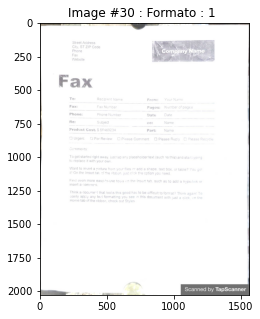

In [7]:
importlib.reload(MyPlot) 
MyPlot.display_random_image(Train,1,False)

## TensorFlow DataSet

In [11]:
tf_Data_train = tf_d.make_tf_dataset(train, training=True,
    batch_size=4, num_epochs=1,
    num_parallel_calls=2)

tf_Data_test = tf_d.make_tf_dataset(test, training=True,
    batch_size=1, num_epochs=1,
    num_parallel_calls=2)

##### Image Plot with bounding box

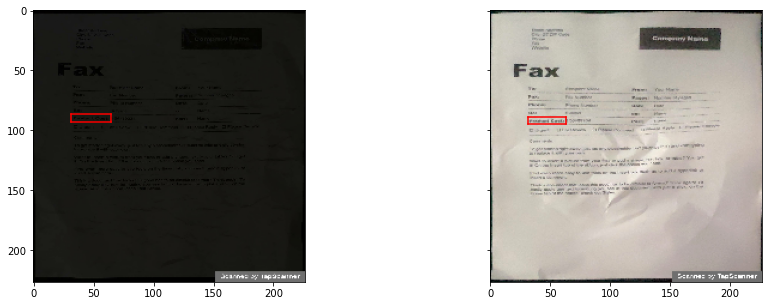

In [12]:
importlib.reload(MyPlot) 
dataset = iter(tf_Data_train)
MyPlot.imshow_batch_of_three(next(dataset),show_box=True, num_images = 2)

#  Analysis

## Bounding Box - Coordinates

<AxesSubplot:>

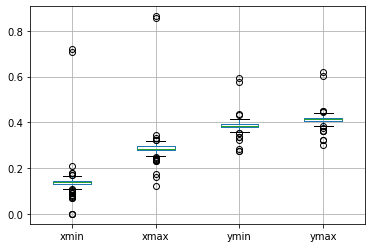

In [13]:
Train[['xmin','xmax','ymin','ymax']].boxplot()

# Modelling




## The LeNet architecture
The LeNet architecture consists of two sets of convolutional, activation, and pooling layers, followed by a fully-connected layer, activation, another fully-connected, and finally a softmax classifier

<img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/lenet_architecture-768x226.png" style="width:40%;">

The LeNet architecture is an excellent “first architecture” for Convolutional Neural Networks (especially when trained on the MNIST dataset, an image dataset for handwritten digit recognition).

LeNet is small and easy to understand — yet large enough to provide interesting results. Furthermore, the combination of LeNet + MNIST is able to run on the CPU, making it easy for beginners to take their first step in Deep Learning and Convolutional Neural Networks.

###### Instance Model

In [14]:
# Define a simple sequential model

def create_model():
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(227,227,3)))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D())

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

    model.add(tf.keras.layers.Dense(units=4, activation = 'sigmoid'))
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(0.0001))

    return model

In [15]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 44944)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5393400   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

##### Evaluate DataSet

In [16]:
print(model.evaluate(tf_Data_train))

36/36 [==============================] - 4s 107ms/step - loss: 0.0932
0.09324257758756478


## Fit Model

In [17]:
H = model.fit(x=tf_Data_train, epochs=10,validation_data=tf_Data_test, validation_steps=1)

Train for 36 steps, validate for 1 steps
Epoch 1/10
36/36 [==============================] - 1s 37ms/step - loss: 0.0095 - val_loss: 0.0044
Epoch 2/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 3/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0074 - val_loss: 0.0038
Epoch 4/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0068 - val_loss: 0.0038
Epoch 5/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0047 - val_loss: 4.0807e-05
Epoch 6/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0033 - val_loss: 1.2300e-04
Epoch 7/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0033 - val_loss: 5.4980e-05
Epoch 8/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0036 - val_loss: 5.8677e-04
Epoch 9/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0032 - val_loss: 2.0620e-04
Epoch 10/10
36/36 [=============================

# Evaluate Results

## Plot training loss

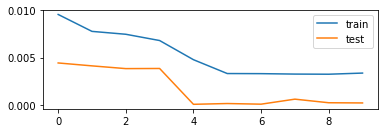

In [18]:
plt.subplot(2,1,1)
plt.plot(H.history['loss'],label='train')
plt.plot(H.history['val_loss'],label='test')
plt.legend()


## Intersection over Union

In the simplest case, segmentation is the process of dividing a digital image into several segments. The result of instance segmentation using Mask R-CNN is a mask applied to the desired object and a bounding box around this object.

[Intersection over union](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=What%20is%20Intersection%20over%20Union,the%20popular%20PASCAL%20VOC%20challenge.) (IoU) is known to be a good metric for measuring overlap between two bounding boxes or masks.

<img src="https://miro.medium.com/max/423/1*2w493Z_V6-sE_3aYa48a9w.png" style="width:40%;">

If the prediction is completely correct, IoU = 1. The lower the IoU, the worse the prediction result.

<img src="https://miro.medium.com/max/646/1*eF0J8KcQqJQF3N0J1vmKwA.png" style="width:40%;">



## Plot Predictions

In [19]:
Data_Predict= model.predict(tf_Data_test)

In [20]:
Data_Predict.shape

(54, 4)

In [21]:
Test.shape

(54, 7)

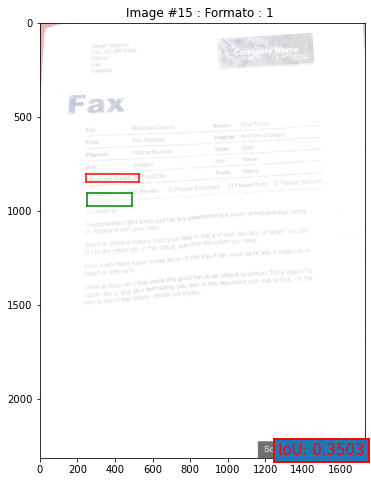

In [29]:
MyPlot.display_random_image_Pre(Test,Data_Predict)

# Conclusions & Next Semester Objectives 


## Small datasets - Overfitting

The goal of a machine learning model is to generalize patterns in training data so that you can correctly predict new data that has never been presented to the model. Overfitting occurs when a model adjusts excessively to the training data, seeing patterns that do not exist, and consequently performing poorly in predicting new data:

<img src="https://miro.medium.com/max/700/1*dpUnwfXqnU5Kd-gfafgIgQ.png" style="width:40%;">

We can appreciate that the model is overfitted because if you look up the loss function, the test line reaches 0 and this cannot happen,training has 350 training and 150 testing images, for an image’s detection model, our data set is very small, we should increase our data set.


## Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.
<img src="https://miro.medium.com/max/600/1*wnWUQe5t_VMWN-zBLa-8Ug.png" style="width:40%;">

## Transfer Learning

Neural networks are a different breed of models compared to the supervised machine learning algorithms. Why do I say so? There are multiple reasons for that, but the most prominent is the cost of running algorithms on the hardware.

- In today’s world, RAM on a machine is cheap and is available in plenty. You need hundreds of GBs of RAM to run a super complex supervised machine learning problem.

- “Transfer Learning” which enables us to use pre-trained models from other people by making small changes. 

<img src="https://www.researchgate.net/profile/Joseph_Lemley/publication/316748306/figure/fig2/AS:491777640669185@1494260334992/Illustration-of-transfer-learning-concept-where-the-rst-layers-in-network-A-and-network-B.png" style="width:40%;">



# References

* Vikram's Original Kernel: https://www.kaggle.com/vikramtiwari/baseline-predictions-using-inception-resnet-v2
* TFHub Demo: https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/object_detection.ipynb
* TFHub Model link: https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1
* Discussion on inveted BBox: https://www.kaggle.com/c/open-images-2019-object-detection/discussion/98205
* Corrected BBox: https://www.kaggle.com/nhlr21/tf-hub-bounding-boxes-coordinates-corrected/notebook
* Tranfer Leraning: https://www.analyticsvidhya.com/blog/2017/06/transfer-learning-the-art-of-fine-tuning-a-pre-trained-model/